In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.cluster.hierarchy import ward , fcluster
from scipy.spatial.distance import pdist, squareform

In [270]:
df=pd.read_csv('decathlon.csv')
df.head()

,Unnamed: 0,"""100m""","""Long.jump"" ""Shot.put""",Shot.put,"""High.jump""","""400m""","""110m.hurdle""","""Discus""","""Pole.vault""","""Javeline""","""1500m""","""Rank""","""Points""","""Competition"""
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [271]:
df['Unnamed: 0'].duplicated().sum()

0

In [272]:
#1 chargement
df=pd.read_csv('decathlon.csv',index_col=0)

In [273]:
df.head(10)

,"""100m""","""Long.jump"" ""Shot.put""",Shot.put,"""High.jump""","""400m""","""110m.hurdle""","""Discus""","""Pole.vault""","""Javeline""","""1500m""","""Rank""","""Points""","""Competition"""
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.1,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.1,10,7733,Decastar


In [274]:
df.shape

(41, 13)

In [275]:
df.columns

Index(['"100m"', '    "Long.jump" "Shot.put"', ' Shot.put', '"High.jump"',
       '"400m"', '"110m.hurdle"', '"Discus"', '"Pole.vault"', '"Javeline"',
       '"1500m"', '"Rank"', '"Points"', '"Competition"'],
      dtype='object')

In [276]:
df.describe()

,"""100m""","""Long.jump"" ""Shot.put""",Shot.put,"""High.jump""","""400m""","""110m.hurdle""","""Discus""","""Pole.vault""","""Javeline""","""1500m""","""Rank""","""Points"""
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


In [277]:
#on garde les colonnes de type numeric
data=df.drop(columns=['"Competition"'])

In [278]:
data.head()

,"""100m""","""Long.jump"" ""Shot.put""",Shot.put,"""High.jump""","""400m""","""110m.hurdle""","""Discus""","""Pole.vault""","""Javeline""","""1500m""","""Rank""","""Points"""
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036


In [279]:
cols_to_normalize=data.columns
cols_to_normalize

Index(['"100m"', '    "Long.jump" "Shot.put"', ' Shot.put', '"High.jump"',
       '"400m"', '"110m.hurdle"', '"Discus"', '"Pole.vault"', '"Javeline"',
       '"1500m"', '"Rank"', '"Points"'],
      dtype='object')

In [280]:
#centrer et reduire nos données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [281]:
data.describe()

,"""100m""","""Long.jump"" ""Shot.put""",Shot.put,"""High.jump""","""400m""","""110m.hurdle""","""Discus""","""Pole.vault""","""Javeline""","""1500m""","""Rank""","""Points"""
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


In [282]:
#2 les cluster
#Appliquer kmeans
cluster_range=[2,3,4,5,6,7,8,9,10]
inertie=[]

for c in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=c).fit(x_scaled)
    inertie.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Le but est de trouver le nombre optimal de clusters qui permet de maximiser la cohésion intra-cluster tout en minimisant la séparation inter-cluster.

In [283]:
# affichage
for a, b in zip(cluster_range, inertie):
    print(a, b)
#Ce code effectue un affichage des valeurs de cluster_range et inertie obtenues à partir de l'étape précédente.

2 375.0229068785619
3 317.7583966207611
4 293.45200527062747
5 258.61137765500735
6 235.8042224250591
7 222.28222663566493
8 211.98854124666377
9 190.58713456549464
10 172.8454343685476


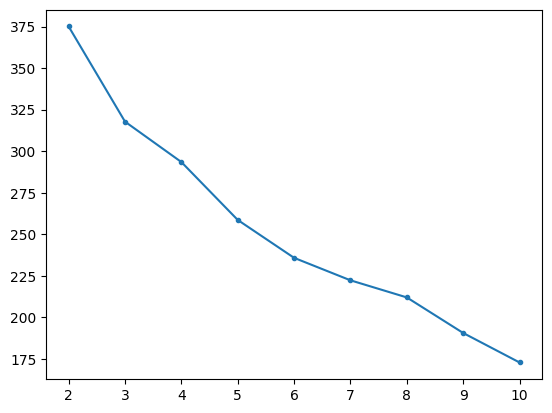

In [284]:
#3 evaluation
#dessiner les inerties calculé
plt.Figure()
plt.plot(cluster_range,inertie,marker='.')
plt.show()
#ce code trace un graphique à partir des données cluster_range (nombre de clusters) en abscisse et inertie en ordonnée.
#Chaque point sur le graphique est représenté par un marqueur '.'

In [285]:
#methode silhouette
silhouette_lst = []
k=2
for i in range(9):
        model = KMeans(n_clusters=k)
        model.fit(x_scaled)
        silhouette_lst.append(silhouette_score(x_scaled, model.labels_))
        k+=1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

nous calculons le score de silhouette pour une série de modèles K-means avec différents nombres de clusters. Le score de silhouette est une mesure de la qualité du regroupement qui indique à quel point chaque point de données est proche de son propre cluster par rapport aux autres clusters.

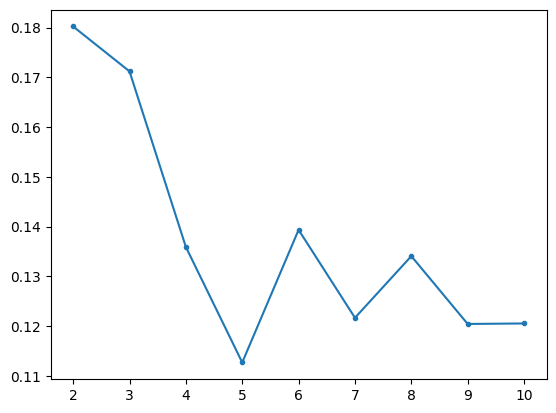

In [286]:
#affichage
plt.plot(cluster_range, silhouette_lst,marker='.')
#on trace un graphique représentant le nombre de clusters en fonction des scores de silhouette.

In [287]:
# on prend k=3
modelfinal = KMeans(n_clusters=3)
modelfinal.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [288]:
#on evalue silhoutte
#on stocke les clusters predits dans la variables labels
labels = modelfinal.labels_

#on va afficher le silhouette score du k choisi
print(silhouette_score(x_scaled,labels))

#ici c'est le plus proche de 1 apart le k=2 donc c'est bon

0.17121029963478263


In [289]:
#apres application de kmeans on ajoute la colonne
data['Cluster'] = modelfinal.labels_
#nous attribuons des étiquettes de cluster aux données de data en utilisant les étiquettes de cluster du modèle K-means final

In [290]:
data.head()

,"""100m""","""Long.jump"" ""Shot.put""",Shot.put,"""High.jump""","""400m""","""110m.hurdle""","""Discus""","""Pole.vault""","""Javeline""","""1500m""","""Rank""","""Points""",Cluster
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,1
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,1
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,1
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,2


In [291]:
#on voit ici le nombre d'individus par cluster pour toutes les colonnes
occurrences = data['Cluster'].value_counts()
print(occurrences)

1    23
2    14
0     4
Name: Cluster, dtype: int64


In [292]:
#on affiche les noms individus( qui est l'index du dataframe) avec leurs clusters correspondant
for i in range(3):
  print(f'Cluster {i}')
  print(data[data.Cluster== i].index.tolist())
  print()

Cluster 0
['Sebrle', 'Clay', 'Karpov', 'Macey']

Cluster 1
['SEBRLE', 'CLAY', 'KARPOV', 'BERNARD', 'WARNERS', 'ZSIVOCZKY', 'McMULLEN', 'Warners', 'Zsivoczky', 'Hernu', 'Nool', 'Bernard', 'Schwarzl', 'Pogorelov', 'Schoenbeck', 'Barras', 'Smith', 'Averyanov', 'Ojaniemi', 'Smirnov', 'Qi', 'Drews', 'Gomez']

Cluster 2
['YURKOV', 'MARTINEAU', 'HERNU', 'BARRAS', 'NOOL', 'BOURGUIGNON', 'Parkhomenko', 'Terek', 'Turi', 'Lorenzo', 'Karlivans', 'Korkizoglou', 'Uldal', 'Casarsa']



In [293]:
#4 visualisation
#on utiliser acp pour la visualisation
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
inertie = pca.explained_variance_ratio_
# afficher le taux d'inertie
print(inertie)

[3.96565866e-01 1.45012180e-01 1.17908530e-01 9.43148325e-02
 7.18285233e-02 5.06099053e-02 4.25375492e-02 3.42570407e-02
 1.96007214e-02 1.56136363e-02 1.17467136e-02 4.50200247e-06]


les deux premieres valeurs de l'inertie sont plus importantes que les autres

In [294]:
#vu que il y'a plus d'information sur les 2 premiers axes  on prend n_components=2
pca = PCA(n_components=2).fit(x_scaled)
x_projected = pca.transform(x_scaled)

le code effectue une réduction de dimensionnalité en utilisant PCA sur les données x_scaled. Il calcule les composantes principales et les utilise pour projeter les données dans un nouvel espace à 2 dimensions, ce qui donne la variable x_projected.

In [295]:
#on prend les dimensions de la data colonne et ligne
n = data.shape[0]
p = data.shape[1]

data.shape[0] renvoie le nombre de lignes, c'est-à-dire le nombre d'observations dans la DataFrame, et data.shape[1] renvoie le nombre de colonnes, c'est-à-dire le nombre de variables dans la DataFrame

In [296]:
#on cherche à voir la valeur maximale et valeur minimale des coordonnées pour la projection
print(np.max(x_projected [:,0]))
print(np.min(x_projected [:,1]))

5.091997003544949
-3.0468655581833883


x_projected[:, 0] sélectionne toutes les lignes de la première colonne de x_projected, c'est-à-dire les valeurs de la première composante projetée.
x_projected[:, 1] sélectionne toutes les lignes de la deuxième colonne de x_projected, c'est-à-dire les valeurs de la deuxième composante projetée.
Ensuite, np.max(x_projected[:, 0]) calcule et affiche la valeur maximale des valeurs de la première composante projetée, tandis que np.min(x_projected[:, 1]) calcule et affiche la valeur minimale des valeurs de la deuxième composante projetée.

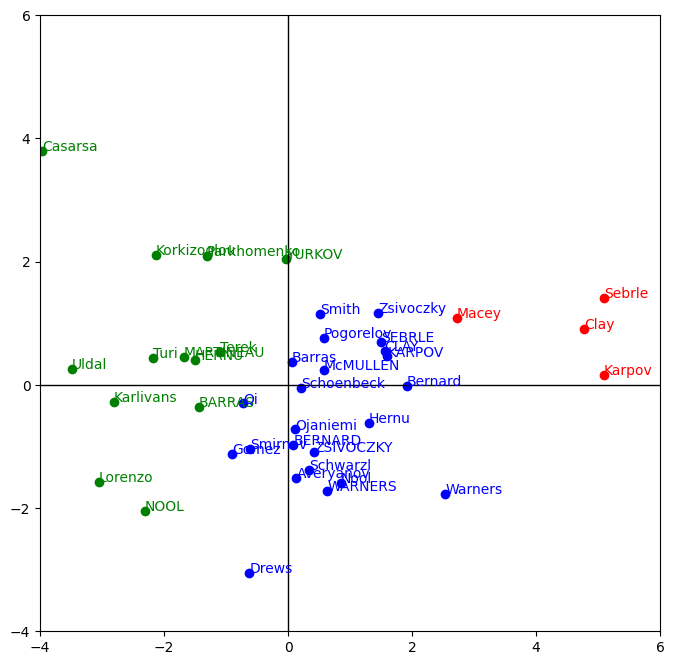

In [297]:
#premiere visualisation en deux dimensions

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-4,6)
axes.set_ylim(-4,6)
plt.plot([-4,6],[0,0],color='black',linewidth=1)
plt.plot([0,0],[-4,6],color='black',linewidth=1)

couleurs = ['red', 'blue', 'green']

for i in range(n):
    plt.scatter(x_projected[i, 0], x_projected[i, 1], c=couleurs[labels[i]])
    plt.annotate(data.index[i],(x_projected [i,0],x_projected [i,1]), c=couleurs[labels[i]])

ce code trace un graphique de dispersion des composantes projetées x_projected, où chaque point est coloré en fonction de son étiquette de cluster. Les lignes noirs tracées à l'origine du graphique aident à visualiser les axes. Les points sont annotés avec les index correspondants à partir de la DataFrame data

In [298]:
# On peut stocker nos centroids dans une variable et  visualiser
centroids = modelfinal.cluster_centers_
centroids_scaled = scaler.fit_transform(centroids)
centroids_proj = pca.transform(centroids_scaled)

nous calculons les centroïdes des clusters du modèle K-means final, puis nous mettons ces centroïdes à l'échelle et les projetons dans l'espace des composantes principales.

In [299]:
#affichage coordonnées des centres
centroids_proj

array([[ 3.80677348,  0.73801848],
       [-0.27295563, -1.33951212],
       [-3.53381786,  0.60149364]])

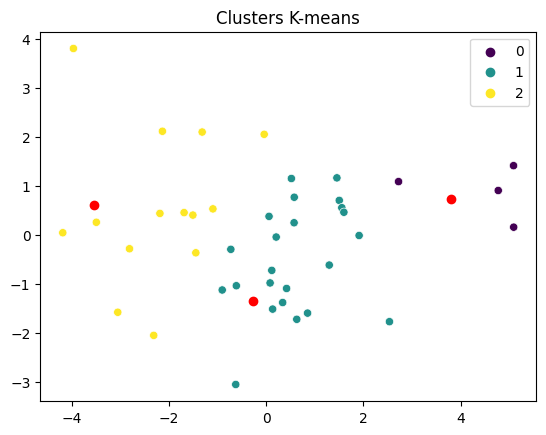

In [300]:
#deuxieme visualisation
sns.scatterplot(data=x_projected, x=x_projected[:, 0], y=x_projected[:, 1], palette = 'viridis', alpha=1, hue=labels)
plt.scatter(centroids_proj[:, 0],centroids_proj[:, 1],color='red')
plt.title("Clusters K-means")
plt.legend()
plt.show()

ce code crée un graphique de dispersion des données projetées avec des marqueurs de couleur représentant les clusters K-means. Les centroïdes des clusters sont également représentés par des marqueurs rouges.

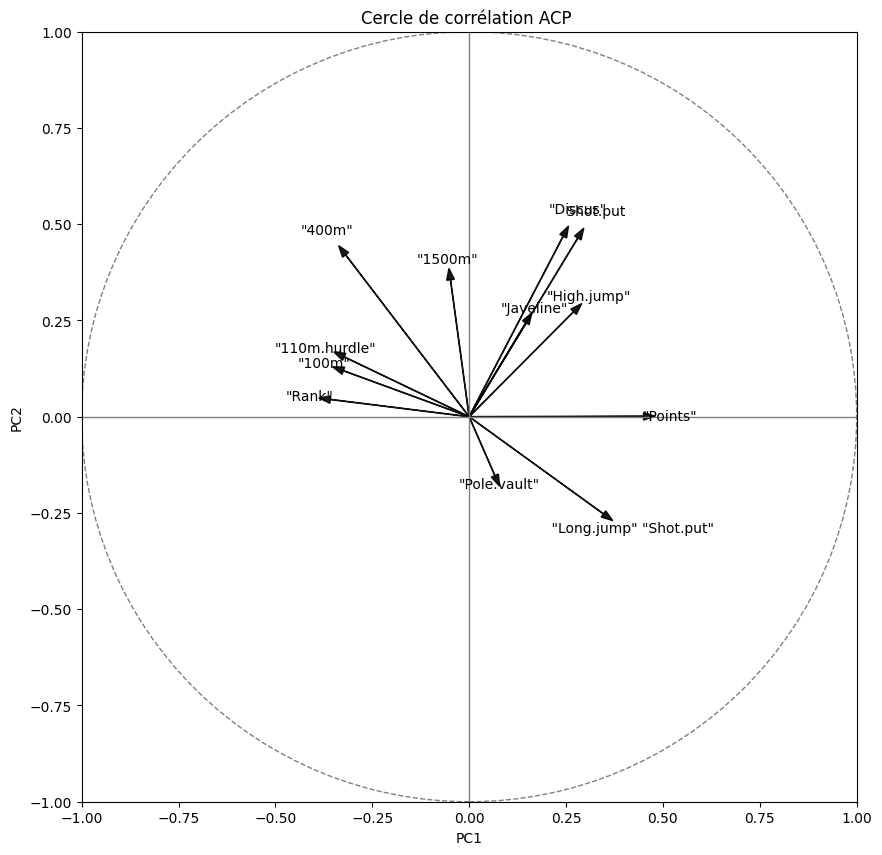

In [301]:
#troisieme visualisation
#cercle de correlation
# Créer le cercle de corrélation
coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation ACP ')

# Afficher la figure
plt.show()

In [302]:
#5 distance
#on fait la meme chose , on garde les type numeric
data2=df.drop(columns=['"Competition"'])

#centrer et reduire nos données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

In [303]:
# on crée la fonction pour le calcule des distances
def dist(dataINPUT):
    # Calculer les distances euclidiennes entre chaque paire d'observations
    distances = pdist(dataINPUT, metric='euclidean')
    # Convertir les distances en une matrice de distances carrée
    distance_matrix = squareform(distances)
    return distance_matrix


distances = pdist(dataINPUT, metric='euclidean') utilise la fonction pdist pour calculer les distances euclidiennes entre chaque paire d'observations dans dataINPUT. L'argument metric='euclidean' indique que la distance euclidienne doit être utilisée comme mesure de distance.

distance_matrix = squareform(distances) utilise la fonction squareform pour convertir les distances calculées en une matrice de distances carrée. Cette matrice contient les distances entre chaque paire d'observations dans dataINPUT.

In [304]:
#on calcule la matrice de distance dans la variable md
md=dist(x_scaled)

In [305]:
#affichage
print(md)
print(md.shape)

[[0.         3.93100623 3.84406714 ... 5.89319138 6.14272744 7.19595092]
 [3.93100623 0.         3.32359184 ... 5.48859011 6.29541241 7.36052687]
 [3.84406714 3.32359184 0.         ... 5.40761001 6.76904938 7.52092991]
 ...
 [5.89319138 5.48859011 5.40761001 ... 0.         4.32033937 4.01160852]
 [6.14272744 6.29541241 6.76904938 ... 4.32033937 0.         3.77479918]
 [7.19595092 7.36052687 7.52092991 ... 4.01160852 3.77479918 0.        ]]
(41, 41)


In [306]:
#6 arbre hierarchique avec methode ward
cah=ward(md)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


cah = ward(md) réalise une classification ascendante hiérarchique (CAH) en utilisant la méthode de liaison de Ward sur une matrice de distances md.
La variable cah contient le résultat de la CAH, c'est-à-dire les informations sur les regroupements formés et les relations de parenté entre les clusters. Ce résultat est utilisé pour analyser la structure des regroupements

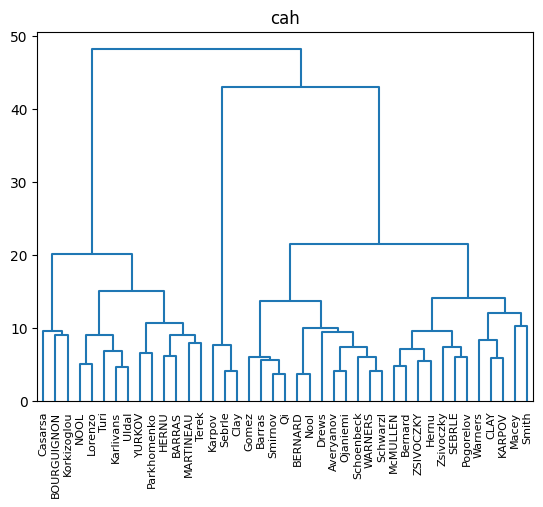

In [307]:
#7 dendrogram
plt.title('cah')
dendrogram(cah,labels=data2.index,color_threshold=0)
#color_threshold=0 valeur de decoupage
#orientation='left'
plt.show()

dendrogram(cah, labels=data2.index, color_threshold=0) trace le dendrogramme en utilisant la fonction dendrogram()
cah est le résultat de la CAH, c'est-à-dire les informations sur les regroupements et les relations de parenté entre les clusters.
labels=data2.index spécifie les étiquettes à utiliser pour les observations sur l'axe des x du dendrogramme. Ici, nous utilisons les index de data2.
color_threshold=0 définit le seuil de couleur à 0. Cela signifie que les liens dans le dendrogramme seront colorés à partir de ce seuil.

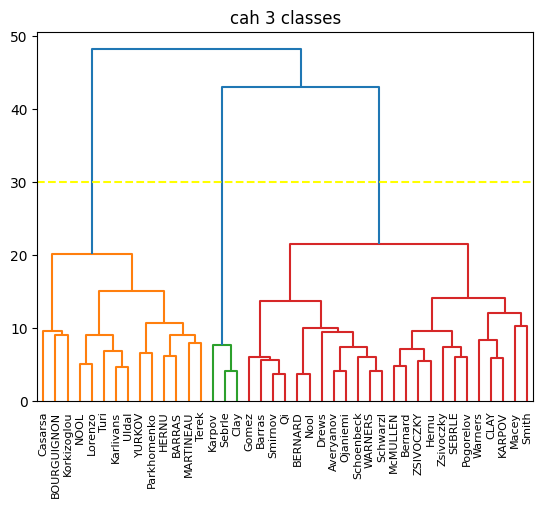

In [308]:
#8 decoupage
plt.title('cah 3 classes')
dendrogram(cah,labels=data2.index)
plt.axhline(y=30, color='yellow', linestyle='--')
plt.show()

la CAH utilise les distances et la méthode de liaison de Ward pour former des regroupements sans seuil spécifique.
 les résultats de la CAH donnent naturellement des groupes distincts, en particulier avec la méthode de liaison de Ward.

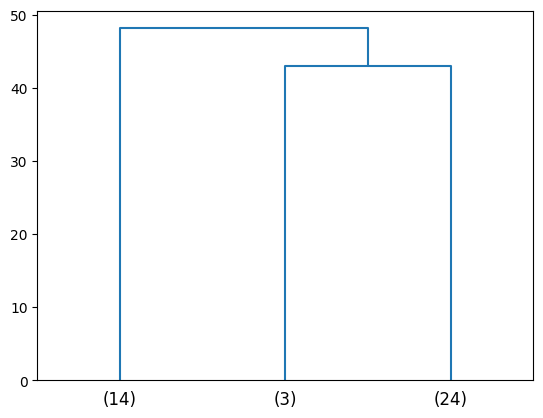

In [309]:
dendrogram(cah,p=3, truncate_mode="lastp")
plt.show()

ce code permet de visualiser une version tronquée du dendrogramme qui ne montre que les trois derniers niveaux de regroupements. Cette visualisation est utile pour identifier les regroupements à un niveau plus global et pour obtenir une vue d'ensemble des relations de parenté entre les clusters.

In [310]:
# decoupage au niveau de 6000
groupes = fcluster(cah , t=30, criterion ='distance' )
print(groupes)

[3 3 3 3 1 3 3 3 1 1 1 1 1 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 1
 1 1 1 1]


fcluster(cah, t=30, criterion='distance') attribue des étiquettes de groupe en utilisant la CAH représentée par cah. Les paramètres sont les suivants :
t=30 spécifie la valeur de seuil de distance à partir de laquelle les observations sont attribuées à des groupes distincts. Les observations dont la distance est supérieure à 30 seront assignées à des groupes différents.
criterion='distance' indique que le critère de classification utilisé est la distance entre les observations

In [311]:
#on affcihe les groupes
for i in np.unique(groupes):
 print( i ,":",data2.index[groupes==i])

1 : Index(['YURKOV', 'MARTINEAU', 'HERNU', 'BARRAS', 'NOOL', 'BOURGUIGNON',
       'Parkhomenko', 'Terek', 'Turi', 'Lorenzo', 'Karlivans', 'Korkizoglou',
       'Uldal', 'Casarsa'],
      dtype='object')
2 : Index(['Sebrle', 'Clay', 'Karpov'], dtype='object')
3 : Index(['SEBRLE', 'CLAY', 'KARPOV', 'BERNARD', 'WARNERS', 'ZSIVOCZKY',
       'McMULLEN', 'Macey', 'Warners', 'Zsivoczky', 'Hernu', 'Nool', 'Bernard',
       'Schwarzl', 'Pogorelov', 'Schoenbeck', 'Barras', 'Smith', 'Averyanov',
       'Ojaniemi', 'Smirnov', 'Qi', 'Drews', 'Gomez'],
      dtype='object')


Avec k means ou arbre hierarchique on obtient 3 cluster à la difference que le nombre d'indivdu dans les clusters differe d'un modele à un autre
